In [1]:
import pandas as pd

file = "D:/MSc_RESEARCH/prototype/code/analysis/validation_data_output/valating_data_results_dataShard-020250927_093150.csv"

In [2]:
df = pd.read_csv(file)
df

,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,elbo,kl_loss,Mse,original_label
0,0.384036,0.463211,0.796814,0.390376,0.121100,0.215060,0.175352,0.225478,0.078517,0.518301,0.632009,0.383883,0.054897,1.686277,0.049838,0
1,0.358158,0.595600,0.876812,0.373398,0.147988,0.258321,0.160472,0.204676,0.088004,0.676163,0.572157,0.384227,0.099462,2.058016,0.093288,0
2,0.372740,0.457296,0.807898,0.389521,0.131756,0.228030,0.170533,0.255154,0.092227,0.479228,0.627641,0.412711,0.055812,0.890114,0.053141,0
3,0.373590,0.471681,0.810515,0.397778,0.133378,0.252884,0.215492,0.151410,0.069145,0.660081,0.637889,0.337730,0.038588,1.827127,0.033107,0
4,0.373826,0.475848,0.803268,0.392944,0.125744,0.234820,0.197477,0.171389,0.069306,0.622644,0.639277,0.351741,0.016720,1.364845,0.012625,0


In [3]:
df.shape

(5, 16)

In [4]:
df_wanted = df["Mse"]
df_wanted

0    0.049838
1    0.093288
2    0.053141
3    0.033107
4    0.012625
Name: Mse, dtype: float64

In [5]:
import numpy as np
threshold = np.percentile(df["Mse"], 70)
threshold

0.05248071178793906

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

y_true = df["original_label"]  # ground truth 0/1
mse_scores = df["Mse"]

# Sweep thresholds
thresholds = np.linspace(min(mse_scores), max(mse_scores), 1000)
best_f1 = 0
best_threshold = thresholds[0]

for t in thresholds:
    y_pred = (mse_scores > t).astype(int)
    _, _, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarn

In [9]:
best_threshold

0.0090785073116421

In [59]:
test_file = "D:/MSc_RESEARCH/prototype/code/analysis/testing_data_output/testing_data_results_dataShard-020250907_093915.csv"

In [60]:
import ast

df_test = pd.read_csv(test_file)

df_test["Mse"]


0        0.065147
1        0.034672
2        0.062190
3        0.037010
4        0.069483
           ...   
11909    0.074952
11910    0.086911
11911    0.046580
11912    0.038089
11913    0.075360
Name: Mse, Length: 11914, dtype: float64

In [61]:
df_final = df_test[["Mse", "original_label"]]
df_final

,Mse,original_label
0,0.065147,1
1,0.034672,0
2,0.062190,0
3,0.037010,1
4,0.069483,1
...,...,...
11909,0.074952,0
11910,0.086911,1
11911,0.046580,1
11912,0.038089,1


In [87]:
df_final["predicted_label"] = df_final["Mse"].apply(lambda x: 1 if x < 0.0083258124068379 else 0)
df_final

C:\Users\ME\AppData\Local\Temp\ipykernel_5580\2974574480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["predicted_label"] = df_final["Mse"].apply(lambda x: 1 if x < 0.0083258124068379 else 0)


,Mse,original_label,predicted_label
0,0.065147,1,0
1,0.034672,0,0
2,0.062190,0,0
3,0.037010,1,0
4,0.069483,1,0
...,...,...,...
11909,0.074952,0,0
11910,0.086911,1,0
11911,0.046580,1,0
11912,0.038089,1,0


In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_true = df_final["original_label"]
y_pred = df_final["predicted_label"]

# Accuracy
acc = accuracy_score(y_true, y_pred)
acc

0.5708410273627665

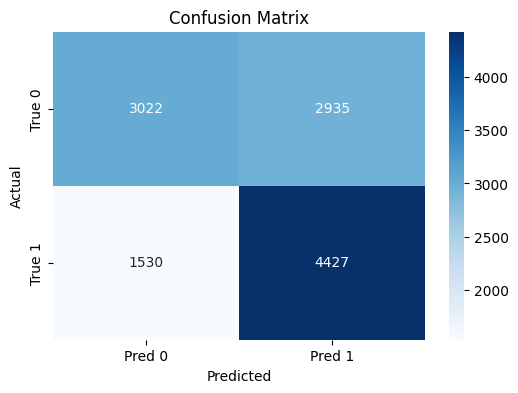

In [83]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Pred 0","Pred 1"], 
            yticklabels=["True 0","True 1"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
cr =classification_report(y_true, y_pred, digits=4)
print(cr)

              precision    recall  f1-score   support

           0     0.6334    0.6621    0.6474      5957
           1     0.6460    0.6168    0.6311      5957

    accuracy                         0.6394     11914
   macro avg     0.6397    0.6394    0.6392     11914
weighted avg     0.6397    0.6394    0.6392     11914



In [69]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = df_final["original_label"]  # ground truth 0/1
mse_scores = df_final["Mse"]

thresholds = np.linspace(min(mse_scores), max(mse_scores), 100)
results = []

for t in thresholds:
    y_pred = (mse_scores > t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary")
    results.append((t, precision, recall, f1))

# Convert to DataFrame for easy analysis
import pandas as pd
df_results = pd.DataFrame(results, columns=["threshold", "precision", "recall", "f1"])
df_results.head(40)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,threshold,precision,recall,f1
0,0.007091,0.500042,1.000000,0.666704
1,0.008912,0.500252,0.999496,0.666779
2,0.010733,0.500547,0.998825,0.666891
3,0.012555,0.501562,0.996978,0.667378
4,0.014376,0.503360,0.993453,0.668172
5,0.016197,0.506578,0.988921,0.669965
6,0.018018,0.509896,0.981702,0.671181
7,0.019840,0.516011,0.973812,0.674574
8,0.021661,0.520352,0.963572,0.675771
9,0.023482,0.525139,0.950311,0.676465
